# Netflix Movies And TV Series
I am going to use netflix dataset for this project. It contain informaion about various contry that what kind of movie or tv series they like to watch and many more things. I will try to make comparisons and graph of various aspect using pytohn and its librar. This was the nice course and easy to understand. Thank you so much for this course.

## Downloading the Dataset

I am using opendatasets lib for downloading this dataset from kaggel this is netflix data set.

Let's begin by downloading the data, and listing the files within the dataset.

In [93]:
# Change this
dataset_url = 'https://www.kaggle.com/shivamb/netflix-shows' 

In [94]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./netflix-shows" (use force=True to force download)


The dataset has been downloaded and extracted.

In [95]:
# Change this
data_dir = '/content/netflix-shows'

In [96]:
import os
os.listdir(data_dir)

['netflix_titles.csv']

Let us save and upload our work to Jovian before continuing.

In [97]:
project_name = "netflix-project" 

In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Preparation and Cleaning

I have readed data and removed null value and extra column that we dont need now I am ready for the further work.



In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [100]:
df= pd.read_csv("/content/netflix-shows/netflix_titles.csv")

In [101]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [102]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [103]:
#we dont need director column we can drop it 
df=df.drop(["director"],axis=True)


In [104]:
df.head()


,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [105]:
# filling all Nan values in date_added column 
df.date_added.fillna("unknown",inplace= True)

In [106]:
df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [107]:
df.country.value_counts()

United States                                   2555
India                                            923
United Kingdom                                   397
Japan                                            226
South Korea                                      183
                                                ... 
Lebanon, United States, United Arab Emirates       1
Canada, United States, Germany                     1
Bulgaria, United States, Spain, Canada             1
South Africa, Nigeria                              1
South Korea, Japan                                 1
Name: country, Length: 681, dtype: int64

In [108]:
# filling null values of country with most occuring country
df.country.fillna("United_states",inplace= True)

In [109]:
df.rating.value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [110]:
df.rating.fillna("TV-MA",inplace= True)

In [111]:
df.isnull().sum()

show_id           0
type              0
title             0
cast            718
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

## Exploratory Analysis and Visualization

Created graph that shoes various realtionships and more things about data. 



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [112]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   cast          7069 non-null   object
 4   country       7787 non-null   object
 5   date_added    7787 non-null   object
 6   release_year  7787 non-null   int64 
 7   rating        7787 non-null   object
 8   duration      7787 non-null   object
 9   listed_in     7787 non-null   object
 10  description   7787 non-null   object
dtypes: int64(1), object(10)
memory usage: 669.3+ KB


This graph show number of content and country realtion.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


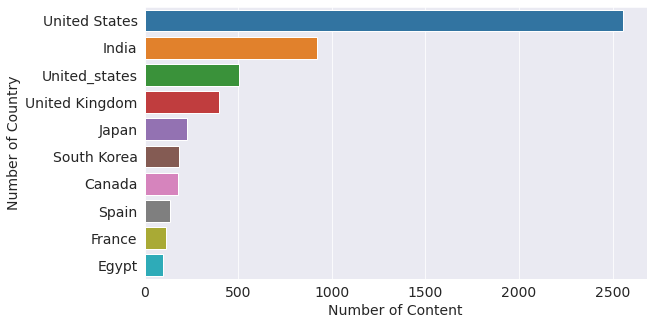

In [114]:
x=df.country.value_counts().head(10)
ax=sns.barplot(x.values,x.index)
ax.set_xlabel("Number of Content")
ax.set_ylabel("Number of Country")
plt.show()

Most of the people like movies rather than Tv shows

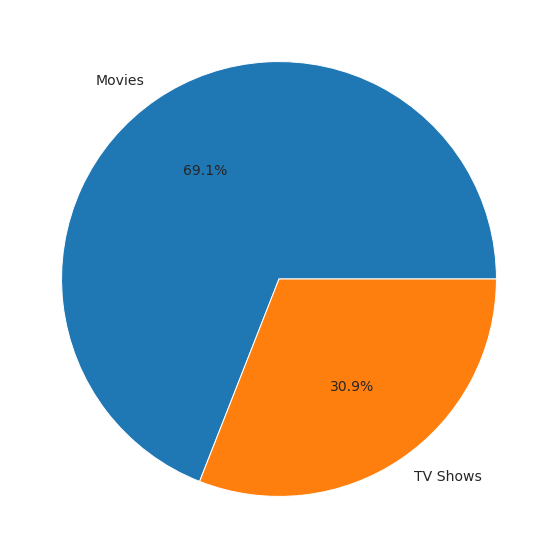

In [115]:
plt.figure(figsize=(10,10))
x=df.type.value_counts()
plt.pie(x.values,labels=["Movies","TV Shows"],autopct="%1.1f%%")
plt.show()

As time passes rate of moies and Tv incrases. 

In [116]:
# Netflix content releases over the years
x= df.release_year.value_counts()

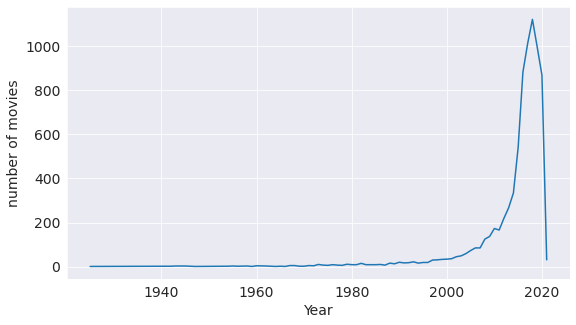

In [117]:
plt.xlabel("Year")
plt.ylabel("number of movies")
sns.lineplot(x=x.index ,y= x.values)
plt.show()

This graph is showing  no. of contents in different ratings 

In [118]:
x=df.rating.value_counts()

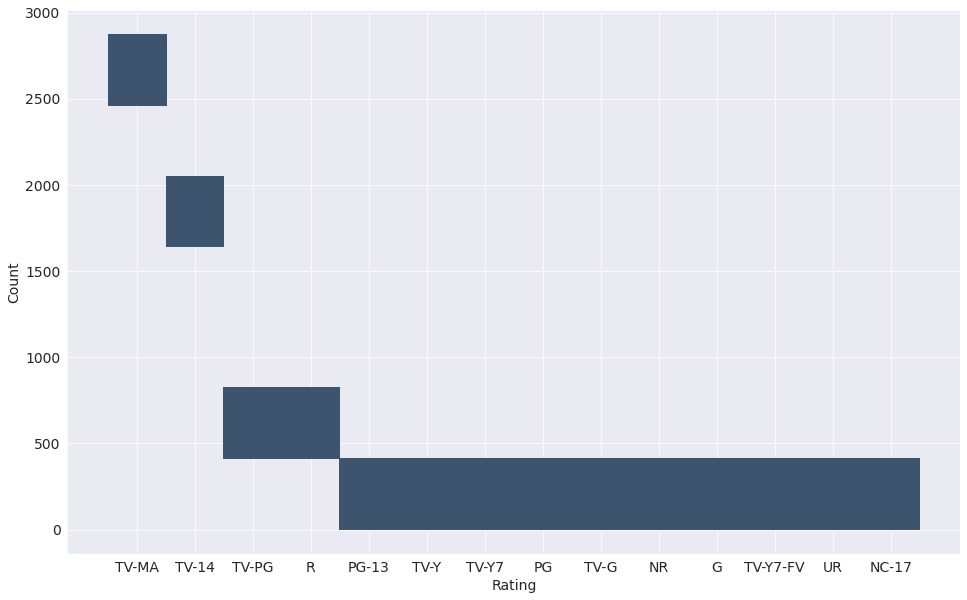

In [119]:
plt.figure(figsize=(16,10))
plt.xlabel("Rating")
plt.ylabel("Count")
sns.histplot(x=x.index ,y= x.values)

same as above 

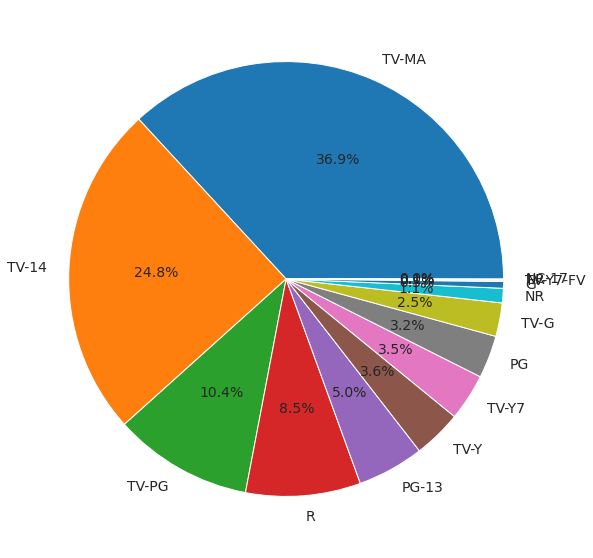

In [120]:
#pie plot of above graph
plt.figure(figsize=(10,10))
plt.pie(x.values,labels=x.index,autopct="%1.1f%%")
plt.show()

#### Q1: What is like by most of the people Tv shoe or movie?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


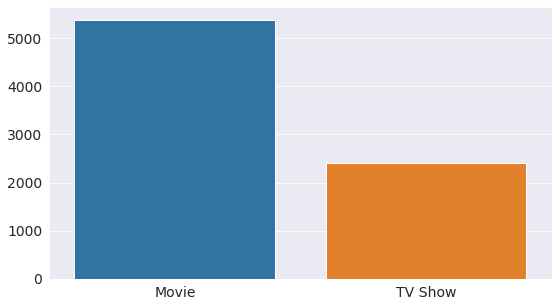

In [121]:
x=df.type.value_counts()
sns.barplot(x.index,x.values)
plt.show()

Movie is liked more than TV show.

#### Q2: Which contry create maximum content?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


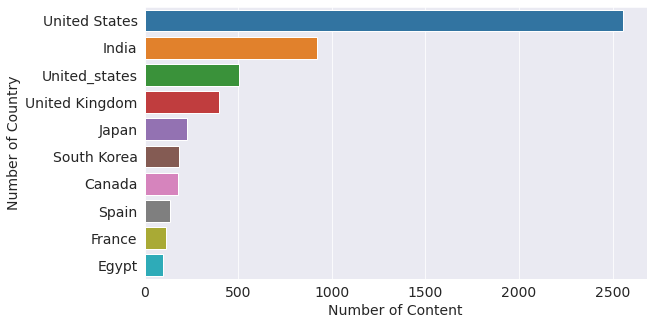

In [122]:
x=df.country.value_counts().head(10)
ax=sns.barplot(x.values,x.index)
ax.set_xlabel("Number of Content")
ax.set_ylabel("Number of Country")
plt.show()

United states create maximum number of content in the world.

#### Q3: Create a graph that show increment in realeases as year passes

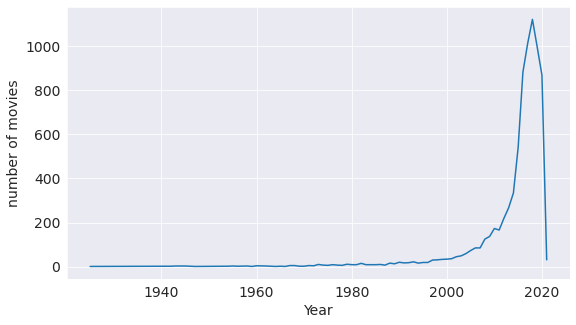

In [123]:
x= df.release_year.value_counts()

plt.xlabel("Year")
plt.ylabel("number of movies")
sns.lineplot(x=x.index ,y= x.values)

plt.show()

As year passes rate of movie increases very fast.

#### Q4: What is rating of diffent content ?


In [124]:
x=df.rating.value_counts()

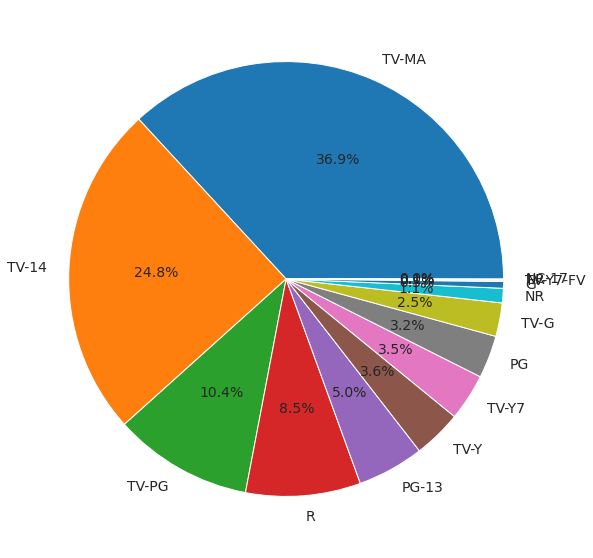

In [125]:
plt.figure(figsize=(10,10))
plt.pie(x.values,labels=x.index,autopct="%1.1f%%")
plt.show()

#### Q5: what is number of content added on netflix over the years

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


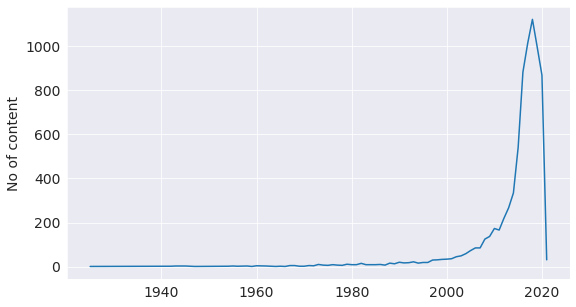

In [126]:
x= df.release_year.value_counts()
ax= sns.lineplot(x.index,x.values)
ax.set_ylabel("No of content")
plt.show()

In [127]:
df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,Nasty C,United_states,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
